In [36]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

<h2>Task 1</h2>

<h3>Monte Carlo integration</h3>

The average value of a (continuous) function $\, f(x) \,$ can be written as

\begin{align*}
    \bar{f} &= \frac{1}{b - a} \int_{a}^{b} f(x) \, dx \\
    (b - a) \bar{f} &= \int_{a}^{b} f(x) \, dx \\
    (b - a) \frac{1}{n} \sum_{i=1}^{n} f(x_i) &\approx \int_{a}^{b} f(x) \, dx, \tag{1}
\end{align*}

where $\, x_i, \, \, i=1,...,n, \,$ are random samples from the interval $\, [a,b]. \,$ This is the key idea behind Monte Carlo integration. This approximation works due to the law of large numbers; the sum $\, (b - a) \frac{1}{n} \sum_{i=1}^{n} f(x_i) \,$ is the sample mean of $\, f(x), \,$ and it converges to the true mean as $\, n \rightarrow \infty. \,$

In our case, the integral we are approximating is

$$ u = \int_{0}^{1} e^{-x^2} \, dx \approx 0.746824.  $$

Plugging these into (1), we get

\begin{align*}
    u = \int_{0}^{1} e^{-x^2} \, dx \approx \frac{1}{n} \sum_{i=1}^{n} e^{-x^2},
\end{align*}

where each $\, x_i, \, \, i=1,...,n, \,$ are drawn from $\, U(a,b). \,$

In [16]:
def f(x):
    return np.exp(-x**2)

In [17]:
def monte_carlo_integration(a, b, n):
    """
    Args:
        a: lower limit of integration
        b: upper limit if integration
        n: the number of random points to generate from U(a,b)
        
    Returns:
        An approximation of the integral introduced above.
    """
    xrand = np.random.uniform(low=a, high=b, size=n)
    result = 0
    for i in range(n):
        result += f(xrand[i])
    return (b-a) * (1/n) * result

**a)**

In [18]:
monte_carlo_integration(a=0, b=1, n=10)

np.float64(0.7907371990370878)

In [19]:
monte_carlo_integration(a=0, b=1, n=100)

np.float64(0.7386882570218469)

In [20]:
monte_carlo_integration(a=0, b=1, n=1000)

np.float64(0.7290041346186261)

**b)**

The variance of the Monte Carlo estimator $\, \mathbb{Q}_n(f(x)) \,$ can be written as

$$ \text{Var}[\mathbb{Q}_n(f(x))] = \text{Var} \left(\frac{1}{n} \sum_{i=1}^{n} f(X_i) \right) = \frac{1}{n^2} \left(\sum_{i=1}^{n} \text{Var}[f(X_i)] \right) = \frac{1}{n} \text{Var}[f(X)]. $$

Hence 

$$ \text{Var}[f(X)] = n \, \text{Var}[\mathbb{Q}_n(f(x))]. $$

In [21]:
def var_MC_estimator(m, n):
    """
    Args:
        m: the number of simulations
        n: the number of random points to generate from U(a,b)
        
    Returns:
        The variance of the Monte Carlo estimator.
    """
    MC_approx = []
    for i in range(m):
        MC_approx.append(monte_carlo_integration(a=0,b=1,n=n))
    return np.var(MC_approx)

In [22]:
var_MC_estimator(m=100, n=10**1)

np.float64(0.003732914818468816)

In [23]:
var_MC_estimator(m=100, n=10**2)

np.float64(0.0004699072981169285)

In [24]:
var_MC_estimator(m=100, n=10**3)

np.float64(3.336306110980379e-05)

The decrease in variance is inversely proportional to the sample size. When the sample size grows by a factor of 10, the variance decreases by a factor of 10.

<h2>Task 2</h2>

For the the ease of notation, let $\, \hat{\theta} = \mathbb{Q}_n(f(X)). \,$
Due to the unbiasedness of the Monte Carlo estimator, the mean squared error (MSE) of the Monte Carlo estimator is

$$ \text{MSE}(\hat{\theta}) = \mathbb{E}[(\hat{\theta} - \theta)^2] = \text{Var}(\hat{\theta}) + [\text{Bias}(\hat{\theta})]^2 = \text{Var}(\hat{\theta}) + 0^2 = \text{Var}(\hat{\theta}) = \frac{1}{n} \text{Var}(f(X)).$$

Thus, we have that

\begin{align*}
    \text{MSE}(\hat{\theta}) &= \frac{1}{n} \text{Var}(f(X)) \\
    n &= \frac{\text{Var}(f(X))}{\text{MSE}(\hat{\theta})}
\end{align*}

**a)**

In [25]:
sigma_sq = var_MC_estimator(m=1000, n=1000) * 1000
mse = 1e-06

In [26]:
n = np.ceil(sigma_sq / mse)
n.item()

41850.0

- The required sample size.

**b)**

In [27]:
theta = monte_carlo_integration(a=0, b=1, n=int(n))
alpha = norm.ppf(q=(1+0.95)/2)
z = alpha * np.sqrt(sigma_sq / n)
[(theta - z).item(), (theta + z).item()]

[0.7452225302039714, 0.749142418103395]

- The 95% confidence interval.
- Pretty accurate, as the true value is 0.746824.

In [28]:
theta.item()

0.7471824741536832

In [45]:
def simulate_distr(m):
    thetas = []
    for i in range(m):
        theta = monte_carlo_integration(a=0, b=1, n=int(n))
        thetas.append(theta)
        
    kde = gaussian_kde(thetas)
    x_vals = np.linspace(min(thetas), max(thetas), 1000)
    y_vals = kde(x_vals)
    plt.hist(thetas, bins=30, density=True, edgecolor='black')
    plt.plot(x_vals, y_vals, color='red')

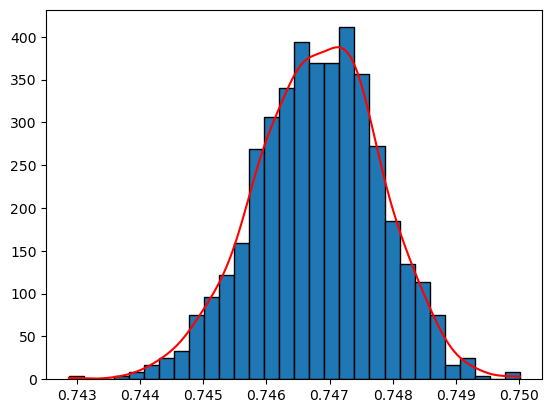

In [46]:
simulate_distr(m=1000)